In [27]:
import re
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
from collections import defaultdict

small = False

if small == True:
    with open('input_small.txt', 'r') as file:
        lines = file.read().splitlines()
        width = 11
        length = 7
else:
    with open('input.txt', 'r') as file:
        lines = file.read().splitlines()
        width = 101
        length = 103

In [29]:
def check_pos(x,y,width,length):
    if x < 0:
        x= x+width
    elif x >= width:
        x= x-width

    if y<0:
        y=y+length
    elif y>=length:
        y=y-length

    
    return x,y

def has_vertical_segment(positions, length=10):
    
    # Group y-values by their x-coordinate
    x_to_ys = defaultdict(list)
    for x, y in positions:
        x_to_ys[x].append(y)
    
    # Check for consecutive y-values for each x-coordinate
    for x, y_values in x_to_ys.items():
        # Sort y-values to check for consecutive segments
        y_values = sorted(y_values)
        
        # Check for at least `length` consecutive y-values
        count = 1
        for i in range(1, len(y_values)):
            if y_values[i] == y_values[i - 1] + 1:  # Consecutive y-values
                count += 1
                if count >= length:
                    return True
            else:
                count = 1  # Reset counter if gap is found
    
    return False

Answer 1: 222208000
Answer 2: 10403


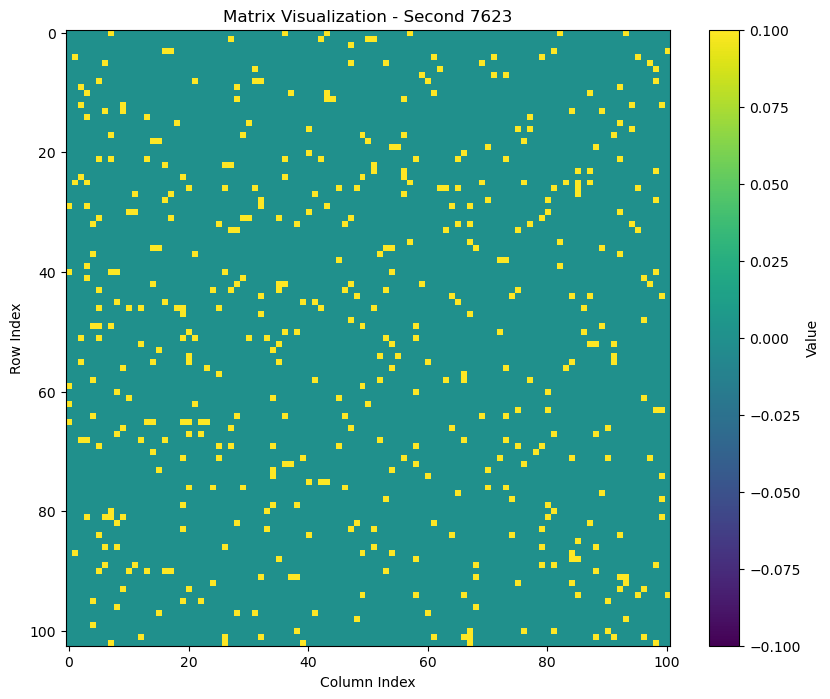

In [36]:
robot_dict = {}
for id in range(len(lines)):
    cx,cy = map(int,re.findall('\d+',lines[id].split(' ')[0]))
    vx,vy = map(int,re.findall('-?\d+',lines[id].split(' ')[1]))
    robot_dict[id] = {'pos':(cx,cy),'vel':(vx,vy)}

# Initialize the grid matrix
end_matrix = [[0 for _ in range(width)] for _ in range(length)]

# Create the initial plot
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(end_matrix, cmap='viridis')
plt.colorbar(img, ax=ax, label='Value')
plt.title(f'Matrix Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Simulation duration
sim_duration = width*length


for sec in range(sim_duration):
    # Update robots' positions and the matrix
    for robot in robot_dict:
        cx, cy = robot_dict[robot]['pos']  # Current position
        vx, vy = robot_dict[robot]['vel']  # Velocity

        # Calculate new position and check boundaries
        nx, ny = check_pos(cx + vx, cy + vy, width, length)
        robot_dict[robot]['pos'] = (nx, ny)

        # Update matrix
        if sec>0:
            end_matrix[cy][cx] -= 1
        end_matrix[ny][nx] += 1

    if sec == 99:
        q1 = sum(sum(sublist[:width//2]) for sublist in end_matrix[:length//2])
        q2 = sum(sum(sublist[(width//2)+1:]) for sublist in end_matrix[:length//2])
        q3 = sum(sum(sublist[:width//2]) for sublist in end_matrix[(length//2)+1:])
        q4 = sum(sum(sublist[(width//2)+1:]) for sublist in end_matrix[(length//2)+1:])
        
        ans_1 = q1*q2*q3*q4
    
    positions = [info['pos'] for info in robot_dict.values() if 'pos' in info]
    if has_vertical_segment(positions):
        print('found vertical segment')
        ax.set_title(f'Matrix Visualization - Second {sec + 1}') 
        img.set_data(end_matrix)
        clear_output(wait=True)
        display(fig)
        # break
        
# Final display (optional, ensures plot stays visible at the end)
img.set_data(end_matrix)
clear_output(wait=True)
print(f'Answer 1: {ans_1}')
print(f'Answer 2: {sec+1}')
plt.show()